In [1]:
from scipy import stats
from fitter import Fitter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize

In [ ]:
data = pd.read_csv("test data_project.csv")

In [3]:
data.keys()

Index(['GRCODE', 'Lob', 'AccidentYear', 'DevelopmentYear', 'DevelopmentLag',
       'Incurred claims', 'PaidLoss', 'BulkLoss_R1', 'EarnedPremDIR_R1',
       'EarnedPremCeded_R1', 'EarnedPremNet_R1', 'Single',
       'PostedReserve97_R1'],
      dtype='object')

In [58]:
data.head()

,GRCODE,Lob,AccidentYear,DevelopmentYear,DevelopmentLag,Incurred claims,PaidLoss,BulkLoss_R1,EarnedPremDIR_R1,EarnedPremCeded_R1,EarnedPremNet_R1,Single,PostedReserve97_R1
0,78,Motor,1970-01-01 00:00:00.000001988,1988,1,29483,3894,18410,29513,0,29513,0,86660
1,78,Fire,1970-01-01 00:00:00.000001988,1989,2,28826,7409,13495,29513,0,29513,0,86660
2,78,Fire,1970-01-01 00:00:00.000001988,1990,3,27063,11199,7770,29513,0,29513,0,86660
3,78,Fire,1970-01-01 00:00:00.000001988,1991,4,26001,16913,4721,29513,0,29513,0,86660
4,78,Fire,1970-01-01 00:00:00.000001988,1992,5,24614,18517,2984,29513,0,29513,0,86660


In [4]:
claim_amounts = data['Incurred claims']
claim_amounts

0       29483
1       28826
2       27063
3       26001
4       24614
        ...  
6995        0
6996        0
6997        0
6998        0
6999        0
Name: Incurred claims, Length: 7000, dtype: int64

In [5]:
claim_amounts.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       29483
1       28826
2       27063
3       26001
4       24614
        ...  
6995        0
6996        0
6997        0
6998        0
6999        0
Name: Incurred claims, Length: 7000, dtype: int64>

<Axes: ylabel='Density'>

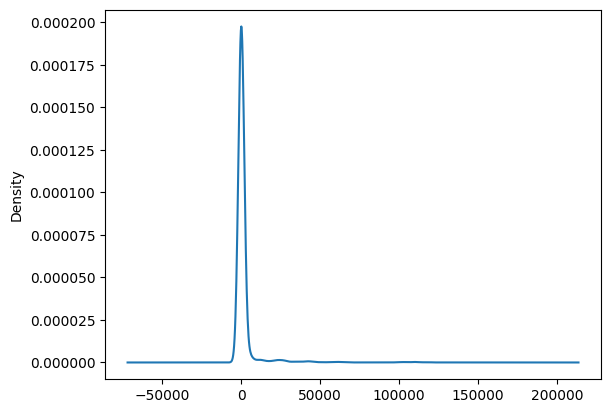

In [6]:
claim_amounts.plot.kde()

In [7]:
f = Fitter(claim_amounts)
f.fit()

Fitting 110 distributions:  75%|███████▌  | 83/110 [05:52<04:33, 10.14s/it]c:\Users\melod\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2060: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._pdf, _a, x, args=args)[0]
c:\Users\melod\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2060: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._pdf, _a, x, args=args)[0]
Fitting 110 distributions:  88%|████████▊ | 97/110 [07:17<01:17,  5.98s/it]c:\Users\melod\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisio

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,9.932013e-09,4375.351815,-190941.615395,inf,0.321808,0.0
johnsonsb,9.938776e-09,4453.066872,-190927.996819,inf,0.328074,0.0
powerlognorm,1.112257e-08,4345.071449,-190140.271628,inf,0.328766,0.0
gilbrat,1.235487e-08,4237.028543,-189422.459913,inf,0.327784,0.0
gibrat,1.235487e-08,4237.028543,-189422.459913,inf,0.327784,0.0


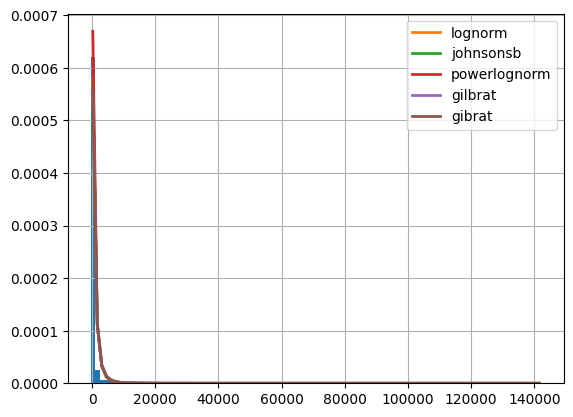

In [8]:
f.summary()

In [9]:
f.get_best()

{'lognorm': {'s': 0.9637111431675187,
  'loc': -504.8551685870864,
  'scale': 776.5091949073188}}

In [10]:
stats.lognorm.rvs(0.9637111431675187, loc=0, scale=1, size=None, random_state=None)

0.5633940304751578

In [11]:
lognorm_dist = stats.lognorm(s=0.9637111431675187, loc=0, scale=30)
lognorm = lognorm_dist.rvs(size=10000)

In [12]:
print (lognorm)

[ 44.54579583  58.63525729  25.55621533 ...  18.87027023 137.86600863
 107.28716968]


In [13]:
lognorm.mean

<function ndarray.mean>

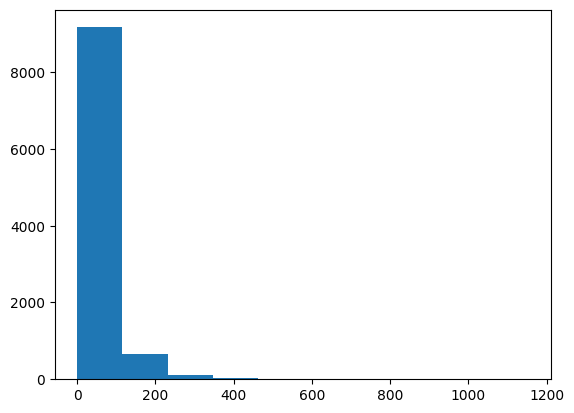

In [14]:
plt.hist(lognorm)
plt.show()

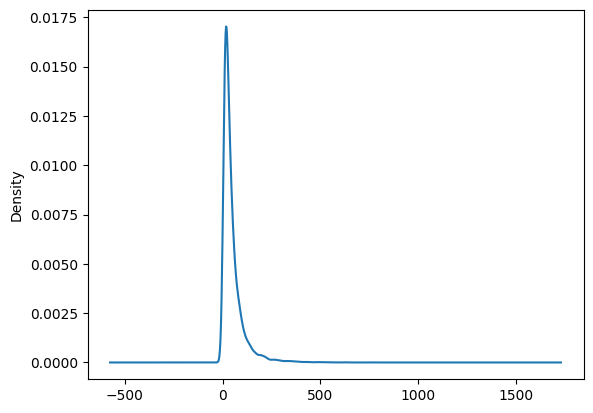

In [15]:
fitted_claim_amounts = pd.Series(lognorm)
fitted_claim_amounts.plot.kde()
plt.show()

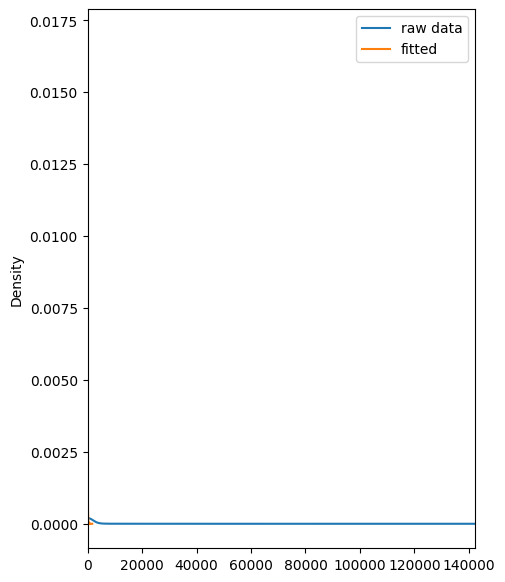

In [59]:
plt.figure(figsize=(5,7))
claim_amounts.plot.kde(label = 'raw data')
fitted_claim_amounts.plot.kde(label =  'fitted')
plt.xlim(0, max(claim_amounts))
plt.legend()
plt.show()

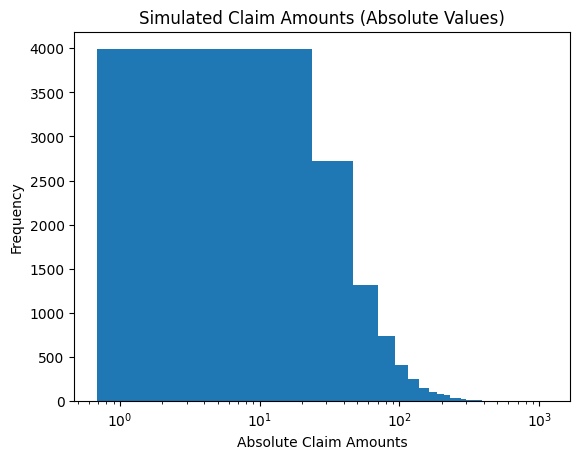

In [17]:
abs_lognorm = np.abs(lognorm)
plt.hist(abs_lognorm, bins=50)
plt.xscale('log')
plt.xlabel('Absolute Claim Amounts')
plt.ylabel('Frequency')
plt.title('Simulated Claim Amounts (Absolute Values)')
plt.show()

In [18]:
bw = 10

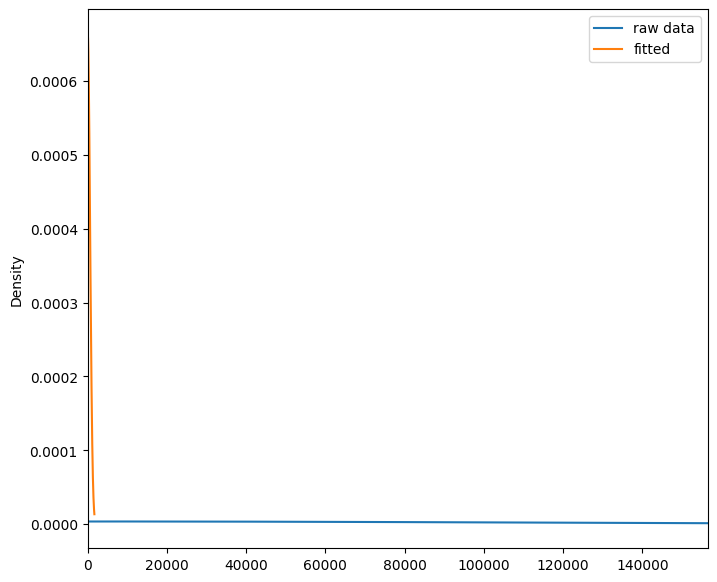

In [19]:
plt.figure(figsize=(8,7))
claim_amounts.plot.kde(label = 'raw data', bw_method=bw)
fitted_claim_amounts.plot.kde(label =  'fitted', bw_method=bw)
plt.xlim(0, max(claim_amounts)*1.1)
plt.legend()
plt.show()

In [20]:
claim_amounts.loc[claim_amounts < 0]

797      -1
923      -4
933      -2
943      -3
952      -1
958      -7
959    -123
961      -2
962      -1
971      -2
1852     -1
2362     -2
2371     -8
2753     -1
2754     -1
2756     -1
2757     -1
2758     -1
2759     -1
3318     -3
3319     -3
3327     -5
3328     -5
3329     -5
3336     -5
3337     -5
3338     -5
3339     -5
3345     -9
3346     -9
3347     -9
3348     -9
3349     -9
3899   -504
4462     -1
4812    -28
4820   -388
5206     -6
5215     -6
5243     -5
5244     -5
5245     -5
5246     -5
5247     -5
5248     -5
5249     -5
6331     -7
6332     -4
6485     -3
6494     -2
Name: Incurred claims, dtype: int64

In [21]:
fitted_claim_amounts.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        44.545796
1        58.635257
2        25.556215
3       270.459900
4        83.449468
           ...    
9995     55.144309
9996     56.613232
9997     18.870270
9998    137.866009
9999    107.287170
Length: 10000, dtype: float64>

In [22]:
mean = fitted_claim_amounts.mean()
mean

48.83790783311381

In [23]:
mean= claim_amounts.mean()
mean

2133.6394285714287

In [24]:
len(fitted_claim_amounts)

10000

In [25]:
len(claim_amounts)

7000

In [26]:
data['AccidentYear'] = pd.to_datetime(data.AccidentYear)

In [27]:
claim_counts = data.AccidentYear.dt.to_period("M").value_counts().sort_index()
claim_counts

AccidentYear
1970-01    7000
Freq: M, Name: count, dtype: int64

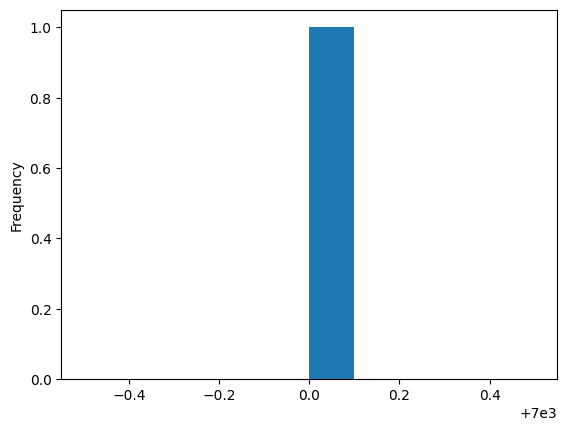

In [28]:
claim_counts.plot.hist()
plt.show()

In [29]:
def poisson_pmf(k, mu):
    return stats.poisson.pmf(k, mu)

In [30]:
hist, bin_edges = np.histogram(claim_counts, bins='auto')

# bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2


In [31]:
len(hist)

1

In [32]:
bin_edges

array([6999.5, 7000.5])

In [33]:
hist

array([1], dtype=int64)

In [34]:
bin_edges

array([6999.5, 7000.5])

In [35]:
claim_counts.sort_values()

AccidentYear
1970-01    7000
Freq: M, Name: count, dtype: int64

In [36]:
poisson_params, _ = optimize.curve_fit(poisson_pmf, bin_edges[:-1], hist)

c:\Users\melod\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [37]:
poisson_params

array([1.])

In [38]:
claim_counts.mean()

7000.0

In [39]:
stats.poisson.rvs(mu = 3, size = len(claim_counts))

array([4], dtype=int64)

In [40]:
f.get_best()

{'lognorm': {'s': 0.9637111431675187,
  'loc': -504.8551685870864,
  'scale': 776.5091949073188}}

Value at Risk @ 95%

In [41]:
# Set the VaR percentile level
VaR_percentile = 0.95

# Sort the simulated returns in ascending order
sorted_claim_amounts = np.sort(fitted_claim_amounts)

# Identify the simulated return at the VaR percentile level
VaR_simulated_claim_amounts = sorted_claim_amounts[int(VaR_percentile * len(sorted_claim_amounts))]

# Assign a weight of 1 to the simulated return at the VaR percentile level, and a weightof 0 to all other simulated returns
weights = np.zeros_like(fitted_claim_amounts)
weights[fitted_claim_amounts <= VaR_simulated_claim_amounts] = 1

# Calculate the weighted average VaR
weighted_VaR = np.average(fitted_claim_amounts, weights=weights)

print("Weighted Average VaR:", weighted_VaR)

Weighted Average VaR: 38.56423935708426


In [42]:
Var_95=weighted_VaR

Value at Risk @ 99.5%

In [43]:
VaR_percentile = 0.995
sorted_claim_amounts = np.sort(fitted_claim_amounts)
VaR_simulated_claim_amounts = sorted_claim_amounts[int(VaR_percentile * len(sorted_claim_amounts))]
weights = np.zeros_like(fitted_claim_amounts)
weights[fitted_claim_amounts <= VaR_simulated_claim_amounts] = 1

# Calculate the weighted average VaR
weighted_VaR = np.average(fitted_claim_amounts, weights=weights)

print("Weighted Average VaR:", weighted_VaR)

Weighted Average VaR: 46.576117544176675


In [44]:
Var_995=weighted_VaR

Value at Risk @ 90%

In [45]:
VaR_percentile = 0.90
sorted_claim_amounts = np.sort(fitted_claim_amounts)
VaR_simulated_claim_amounts = sorted_claim_amounts[int(VaR_percentile * len(sorted_claim_amounts))]
weights = np.zeros_like(fitted_claim_amounts)
weights[fitted_claim_amounts <= VaR_simulated_claim_amounts] = 1

# Calculate the weighted average VaR
weighted_VaR = np.average(fitted_claim_amounts, weights=weights)

print("Weighted Average VaR:", weighted_VaR)

Weighted Average VaR: 33.78154131446658


In [46]:
Var_90=weighted_VaR

Tail Value at Risk

TVaR @ 90%

In [47]:

# Sort the claim amounts in ascending order
sorted_claims = np.sort(fitted_claim_amounts)

# Calculate the TVaR at the 90th percentile as the value at the 10th index in the sorted array
tvar = sorted_claims[int(0.1 * sorted_claims.shape[0])]

# Create a binary array where the value is 1 if the claim amount is above the 90th percentile, and 0 otherwise
binary_array = np.zeros_like(fitted_claim_amounts)
binary_array[fitted_claim_amounts > tvar] = 1

# Calculate the proportion of claim amounts that are above the 90th percentile
prop_above_percentile = np.sum(binary_array) / len(fitted_claim_amounts)

# Calculate the weights for each claim amount as the binary array, divided by the proportion of claim amounts that are above the 90th percentile
weights = binary_array / prop_above_percentile

# Calculate the weighted average of the claim amounts by multiplying the claim amountvalues by the corresponding weights and summing the results
weighted_avg = np.sum(fitted_claim_amounts * weights)
weighted_avg
print("TVaR_90CL:", weighted_avg)

TVaR_90CL: 535898.3870010083


In [48]:
TVaR_90CL=weighted_avg
TVaR_90CL

535898.3870010083

TVaR @ 99%

In [49]:
# Calculate the TVaR at the 99.5th percentile as the value at the 99.5th index in the sorted array
tvar = sorted_claims[int(0.005 * sorted_claims.shape[0])]

# Create a binary array where the value is 1 if the claim amount is above the 99.5th percentile, and 0 otherwise
binary_array = np.zeros_like(fitted_claim_amounts)
binary_array[fitted_claim_amounts > tvar] = 1

# Calculate the proportion of claim amounts that are above the 90th percentile
prop_above_percentile = np.sum(binary_array) / len(fitted_claim_amounts)

# Calculate the weights for each claim amount as the binary array, divided by the proportion of claim amounts that are above the 90th percentile
weights = binary_array / prop_above_percentile

# Calculate the weighted average of the claim amounts by multiplying the claim amountvalues by the corresponding weights and summing the results
weighted_avg = np.sum(fitted_claim_amounts * weights)
weighted_avg
print("TVaR_995CL:", weighted_avg)

TVaR_995CL: 490785.2157302942


In [50]:
TVaR_995CL= weighted_avg
TVaR_995CL

490785.2157302942

TVaR @ 95%

In [51]:
# Calculate the TVaR at the 95th percentile as the value at the 5th index in the sorted array
tvar = sorted_claims[int(0.05 * sorted_claims.shape[0])]

# Create a binary array where the value is 1 if the claim amount is above the 95th percentile, and 0 otherwise
binary_array = np.zeros_like(fitted_claim_amounts)
binary_array[fitted_claim_amounts > tvar] = 1

# Calculate the proportion of claim amounts that are above the 90th percentile
prop_above_percentile = np.sum(binary_array) / len(fitted_claim_amounts)

# Calculate the weights for each claim amount as the binary array, divided by the proportion of claim amounts that are above the 90th percentile
weights = binary_array / prop_above_percentile

# Calculate the weighted average of the claim amounts by multiplying the claim amountvalues by the corresponding weights and summing the results
weighted_avg = np.sum(fitted_claim_amounts * weights)
weighted_avg
print("TVaR_95CL:", weighted_avg)

TVaR_95CL: 511775.50517416385


In [52]:
TVaR_95CL=weighted_avg
TVaR_95CL

511775.50517416385

RISK ADJUSTMENT CALCULATION

In [53]:
# the Risk adjustment is calculated as the risk measure less mean

In [54]:
TVaR_values=[TVaR_90CL, TVaR_95CL, TVaR_995CL]
TVaR_values

[535898.3870010083, 511775.50517416385, 490785.2157302942]

In [55]:
VaR_values=[Var_90,Var_95,Var_995]

In [56]:
mean

2133.6394285714287

In [63]:
cl_values=(90 , 95 , 99)

In [72]:

# Calculate the risk adjustment as the difference between weighted average TVaR and mean claim amount
risk_adjustment = np.array(TVaR_values) - mean

# Create a DataFrame to present the output in the form of a table
output_results = pd.DataFrame({
    'CL %': cl_values,
    'TVaR': TVaR_values,
    'Risk Adjustment': risk_adjustment
})

# Print the output DataFrame
print(output_results)

   CL %           TVaR  Risk Adjustment
0    90  535898.387001    533764.747572
1    95  511775.505174    509641.865746
2    99  490785.215730    488651.576302


In [65]:
# Calculate the risk adjustment as the difference between weighted average TVaR and mean claim amount
risk_adjustment = np.array(VaR_values) - mean

# Create a DataFrame to present the output in the form of a table
output_VaR = pd.DataFrame({
    'CL %': cl_values,
    'VaR': VaR_values,
    'Risk Adjustment': risk_adjustment
})

# Print the output DataFrame
print(output_VaR)

   CL %        VaR  Risk Adjustment
0    90  33.781541     -2099.857887
1    95  38.564239     -2095.075189
2    99  46.576118     -2087.063311


In [70]:
import statsmodels.api as sm


In [73]:
output_results

,CL %,TVaR,Risk Adjustment
0,90,535898.387001,533764.747572
1,95,511775.505174,509641.865746
2,99,490785.215730,488651.576302


In [78]:
tvar_risk_adjustment = np.array([533764.747572, 509641.865746, 488651.576302])

var_risk_adjustment = np.array([-2099.857887, -2095.075189, -2087.063311])

# Compare rankings
rank_tvar = np.argsort(tvar_risk_adjustment)
rank_var = np.argsort(var_risk_adjustment)

consistent = np.array_equal(rank_tvar, rank_var)

# Print the result
print("Consistency between TVaR and VaR:", consistent)


Consistency between TVaR and VaR: False


In [79]:

tvar_risk_adjustments = np.array([533764.747572, 509641.865746, 488651.576302])

var_risk_adjustments = np.array([-2099.857887, -2095.075189, -2087.063311])

# Calculate relative changes
relative_changes = np.diff(tvar_risk_adjustments) / tvar_risk_adjustments[:-1]

# Print the relative changes
print("Relative Changes:")
for i, change in enumerate(relative_changes):
    print(f"From {i+90}% to {i+95}%: {change:.4f}")


Relative Changes:
From 90% to 95%: -0.0452
From 91% to 96%: -0.0412


In [80]:
from scipy.stats import kstest, anderson

# Risk adjustment data (example values)
risk_adjustments = np.array([533764.747572, 509641.865746, 488651.576302])

# Perform Kolmogorov-Smirnov test
ks_statistic, ks_pvalue = kstest(risk_adjustments, 'norm')
print("Kolmogorov-Smirnov test:")
print("KS Statistic:", ks_statistic)
print("KS p-value:", ks_pvalue)

# Perform Anderson-Darling test
ad_statistic, ad_critical_values, ad_significance_levels = anderson(risk_adjustments, dist='norm')
print("Anderson-Darling test:")
print("AD Statistic:", ad_statistic)
print("AD Critical Values:", ad_critical_values)
print("AD Significance Levels:", ad_significance_levels)


Kolmogorov-Smirnov test:
KS Statistic: 1.0
KS p-value: 0.0
Anderson-Darling test:
AD Statistic: 0.19127714707622845
AD Critical Values: [-1.296 -1.476 -1.771 -2.065 -2.457]
AD Significance Levels: [15.  10.   5.   2.5  1. ]


In [ ]:
0.9637111431675187

In [87]:
import numpy as np
from scipy.stats import kstest, norm

# Risk adjustment data (example values)
risk_adjustments = np.array([533764.747572, 509641.865746, 488651.576302])

# Transform the risk adjustment data to a logarithmic scale
log_risk_adjustments = np.log(risk_adjustments)

# Perform Kolmogorov-Smirnov test with normal distribution approximation
ks_statistic, ks_pvalue = kstest(log_risk_adjustments, norm(loc=np.mean(log_risk_adjustments), scale=np.std(log_risk_adjustments)).cdf)
print("Kolmogorov-Smirnov test:")
print("KS Statistic:", ks_statistic)
print("KS p-value:", ks_pvalue)


Kolmogorov-Smirnov test:
KS Statistic: 0.2265176927090995
KS p-value: 0.9897090365087072


In [88]:
risk_adjustments = np.array([-2099.857887, -2095.075189, -2087.063311])

# Transform the risk adjustment data to a logarithmic scale
log_risk_adjustments = np.log(risk_adjustments)

# Perform Kolmogorov-Smirnov test with normal distribution approximation
ks_statistic, ks_pvalue = kstest(log_risk_adjustments, norm(loc=np.mean(log_risk_adjustments), scale=np.std(log_risk_adjustments)).cdf)
print("Kolmogorov-Smirnov test:")
print("KS Statistic:", ks_statistic)
print("KS p-value:", ks_pvalue)


Kolmogorov-Smirnov test:
KS Statistic: nan
KS p-value: nan
